# Predictive Weather Analytics: Understanding Temperature, Rainfall & User Decisions in Delhi


In [ ]:
#Delhi experiences unpredictable temperature fluctuations and irregular rainfall patterns.
#Users struggle to make daily decisions such as planning travel, choosing clothing, carrying an umbrella, or estimating whether laundry will dry.
#Traditional weather apps only show raw numbers but do not explain patterns or give meaningful insights.
#There is a need for a system that analyzes historical weather data, 
#identifies seasonal trends, predicts future temperature values, and converts this into practical, human-friendly recommendations

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
df = pd.read_csv("Dehli rain prediction day wise.csv")


In [2]:
df.head()

,_id,Date,Rain,Temp Max,Temp Min,Temp_diff,Has_rained,Month,Year,Day,Week,month_name
0,1,01-01-1951,0,20.139999,3.68,16.459999,NO,1,1951,1,2,January
1,2,02-01-1951,0,21.680000,3.60,18.080000,NO,1,1951,2,3,January
2,3,03-01-1951,0,21.280001,3.51,17.770001,NO,1,1951,3,4,January
3,4,04-01-1951,0,21.610001,4.09,17.520000,NO,1,1951,4,5,January
4,5,05-01-1951,0,21.389999,5.10,16.289999,NO,1,1951,5,6,January


# Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26803 entries, 0 to 26802
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         26803 non-null  int64  
 1   Date        26803 non-null  object 
 2   Rain        26751 non-null  object 
 3   Temp Max    26749 non-null  float64
 4   Temp Min    26748 non-null  float64
 5   Temp_diff   26751 non-null  float64
 6   Has_rained  26751 non-null  object 
 7   Month       26803 non-null  int64  
 8   Year        26803 non-null  int64  
 9   Day         26803 non-null  int64  
 10  Week        26803 non-null  int64  
 11  month_name  26803 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.5+ MB


In [4]:
df.describe()

,_id,Temp Max,Temp Min,Temp_diff,Month,Year,Day,Week
count,26803.000000,26749.000000,26748.000000,26751.000000,26803.000000,26803.000000,26803.000000,26803.000000
mean,13402.000000,31.701686,18.251060,13.450303,6.509047,1987.192590,15.725031,4.000000
std,7737.503969,6.723787,7.620967,3.639263,3.446460,21.184969,8.799378,2.000037
min,1.000000,11.650000,0.900000,0.000000,1.000000,1951.000000,1.000000,1.000000
25%,6701.500000,26.559999,11.220000,10.460001,4.000000,1969.000000,8.000000,2.000000
50%,13402.000000,32.900002,19.665000,14.270000,7.000000,1987.000000,16.000000,4.000000
75%,20102.500000,36.240002,25.180000,16.360001,10.000000,2006.000000,23.000000,6.000000
max,26803.000000,47.459999,34.800000,22.700000,12.000000,2024.000000,31.000000,7.000000


In [5]:
df.isnull().sum()

_id            0
Date           0
Rain          52
Temp Max      54
Temp Min      55
Temp_diff     52
Has_rained    52
Month          0
Year           0
Day            0
Week           0
month_name     0
dtype: int64

#Handling the NULL values

In [6]:
#Replacing the null values with median
df['Temp Max'] = df.groupby('Month')['Temp Max'].transform(lambda x: x.fillna(x.median()))
df['Temp Min'] = df.groupby('Month')['Temp Min'].transform(lambda x: x.fillna(x.median()))

# recalculating the value of temp_diff column
df['Temp_diff'] = df['Temp Max'] - df['Temp Min']

In [7]:
df.isnull().sum()

_id            0
Date           0
Rain          52
Temp Max       0
Temp Min       0
Temp_diff      0
Has_rained    52
Month          0
Year           0
Day            0
Week           0
month_name     0
dtype: int64

In [8]:
#Dropping the null values of rain and has_rained , because we are not sure weather it has rained on that day or not

In [9]:
df = df.dropna(subset=['Rain', 'Has_rained'], how='all')

In [10]:
df.isnull().sum()

_id           0
Date          0
Rain          0
Temp Max      0
Temp Min      0
Temp_diff     0
Has_rained    0
Month         0
Year          0
Day           0
Week          0
month_name    0
dtype: int64

In [11]:
df.head(30)

,_id,Date,Rain,Temp Max,Temp Min,Temp_diff,Has_rained,Month,Year,Day,Week,month_name
0,1,01-01-1951,0,20.139999,3.68,16.459999,NO,1,1951,1,2,January
1,2,02-01-1951,0,21.680000,3.60,18.080000,NO,1,1951,2,3,January
2,3,03-01-1951,0,21.280001,3.51,17.770001,NO,1,1951,3,4,January
3,4,04-01-1951,0,21.610001,4.09,17.520000,NO,1,1951,4,5,January
4,5,05-01-1951,0,21.389999,5.10,16.289999,NO,1,1951,5,6,January
5,6,06-01-1951,0,20.990000,6.21,14.780000,NO,1,1951,6,7,January
6,7,07-01-1951,0.133744702,20.260000,7.87,12.390000,YES,1,1951,7,1,January
7,8,08-01-1951,0,17.500000,6.74,10.760000,NO,1,1951,8,2,January
8,9,09-01-1951,0,20.010000,5.58,14.430000,NO,1,1951,9,3,January
9,10,10-01-1951,0,20.090000,5.92,14.170000,NO,1,1951,10,4,January


In [12]:
#Adding few more columns for the prediction.

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Rain_Yesterday'] = df['Rain'].shift(1)
df['TempMax_Yesterday'] = df['Temp Max'].shift(1)
df['TempMin_Yesterday'] = df['Temp Min'].shift(1)
df['TempDiff_Yesterday'] = df['Temp_diff'].shift(1)
df["RainTomorrow"] = df["Has_rained"].shift(-1)
# Season (categorical)
def season(month):
    if month in [6,7,8,9]:
        return "Monsoon"
    elif month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    else:
        return "Post-Monsoon"
df['Season'] = df['Month'].apply(season)

# Binary Is_Monsoon
df['Is_Monsoon'] = df['Month'].isin([6,7,8,9]).astype(int)

# Day of Year
df['Day_of_Year'] = pd.to_datetime(df['Date']).dt.dayofyear

In [14]:
df.head()

,_id,Date,Rain,Temp Max,Temp Min,Temp_diff,Has_rained,Month,Year,Day,Week,month_name,Rain_Yesterday,TempMax_Yesterday,TempMin_Yesterday,TempDiff_Yesterday,RainTomorrow,Season,Is_Monsoon,Day_of_Year
0,1,1951-01-01,0,20.139999,3.68,16.459999,NO,1,1951,1,2,January,None,NaN,NaN,NaN,NO,Winter,0,1
1,2,1951-01-02,0,21.680000,3.60,18.080000,NO,1,1951,2,3,January,0,20.139999,3.68,16.459999,NO,Winter,0,2
2,3,1951-01-03,0,21.280001,3.51,17.770001,NO,1,1951,3,4,January,0,21.680000,3.60,18.080000,NO,Winter,0,3
3,4,1951-01-04,0,21.610001,4.09,17.520000,NO,1,1951,4,5,January,0,21.280001,3.51,17.770001,NO,Winter,0,4
4,5,1951-01-05,0,21.389999,5.10,16.289999,NO,1,1951,5,6,January,0,21.610001,4.09,17.520000,NO,Winter,0,5


# Model 1 — Rainfall Prediction 

In [15]:
#Objective:

#To build a machine learning model that predicts whether it will rain tomorrow based on historical weather patterns, 
#such as temperature, month, and previous day rain.
#This model acts like an AI-powered weather forecast, helping in early planning for agriculture, traffic management, festivals, and disaster response.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("Dehli rain prediction day wise.csv")



df["Rain"] = df["Rain"].replace("Tr", 0)
df["Rain"] = pd.to_numeric(df["Rain"], errors="coerce")


df["Has_rained"] = df["Has_rained"].astype(str).str.strip().str.title()



df["Has_rained"] = df["Has_rained"].replace({
    "Yes": "Yes",
    "No": "No",
    "1": "Yes",
    "0": "No",
    "Nan": np.nan,
    "": np.nan
})


df["RainTomorrow"] = df["Has_rained"].shift(-1)


df.dropna(subset=["RainTomorrow"], inplace=True)


df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})


X = df[["Month", "Temp Max", "Temp Min", "Temp_diff", "Rain"]]
y = df["RainTomorrow"]



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("\n------ Random Forest Results ------")
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))



------ Random Forest Results ------
Accuracy: 0.8538317757009346
Precision: 0.6171107994389902
Recall: 0.4636459430979979
F1 Score: 0.529482551143201

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4401
           1       0.62      0.46      0.53       949

    accuracy                           0.85      5350
   macro avg       0.75      0.70      0.72      5350
weighted avg       0.84      0.85      0.85      5350



#Feature Importance Plot

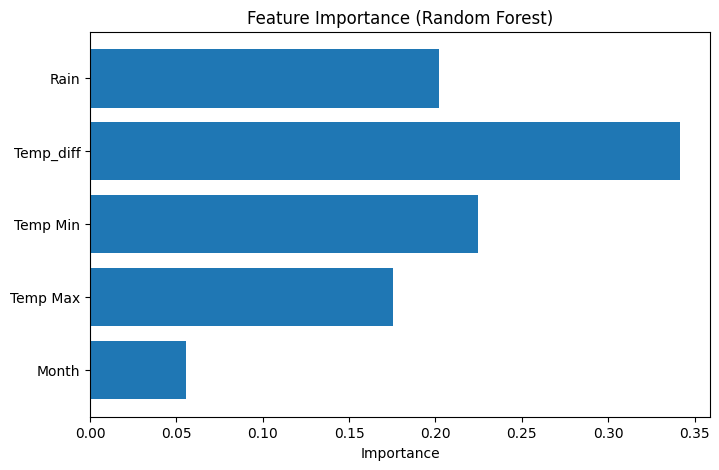

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
importances = rf.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [18]:
# This suggests that If Temp_diff is the highest bar, it means:

# The size of temperature variation in a day is the strongest predictor of whether it will rain tomorrow.

In [19]:
 # Predicting Wheather it will rain tommorrow or not

In [20]:
sample = pd.DataFrame({
    "Month": [12],      
    "Temp Max": [14],
    "Temp Min": [8],
    "Temp_diff": [6],
    "Rain": [0]         # assuming no rain today
})

prediction = rf.predict(sample)[0]
prob = rf.predict_proba(sample)[0][1]

print("Prediction (0 = No rain, 1 = Rain):", prediction)
print("Probability of Rain Tomorrow:", prob)


Prediction (0 = No rain, 1 = Rain): 0
Probability of Rain Tomorrow: 0.016666666666666666


In [21]:
# It predicts there will be no rain on 10/12/2024 , hence the prediction is right

# MODEL - 2(Temperature Prediction (Regression Model))


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Dehli rain prediction day wise.csv")



df["Rain"] = df["Rain"].replace("Tr", 0)

# List of possible numeric columns
possible_numeric = [
    "Rain", "Temp Max", "Temp Min", "Temp_diff",
    "Rain_Yesterday", "TempMax_Yesterday",
    "TempMin_Yesterday", "TempDiff_Yesterday",
    "Month", "Year", "Day", "Week", "Day_of_Year",
    "Is_Monsoon" , 
]

numeric_cols = [col for col in possible_numeric if col in df.columns]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")




cat_cols = df.select_dtypes(include=["object"]).columns

label = LabelEncoder()

for col in cat_cols:
    df[col] = df[col].astype(str).fillna("Unknown")
    df[col] = label.fit_transform(df[col])


df.dropna(subset=numeric_cols, inplace=True)



y = df["Temp Max"]
X = df.drop(["Temp Max", "_id", "Date"], axis=1, errors="ignore")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.05357788439811163
R² Score: 0.9996964555025084


In [23]:
# Checking  model on real data

In [24]:
import pandas as pd



feature_order = [
    'Rain',
    'Temp Min',
    'Temp_diff',
    'Has_rained',
    'Month',
    'Year',
    'Day',
    'Week',
    'month_name'
]

# Mapping month names to numbers
month_name_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

# predicting for for 9/12/2025 ----
custom_input = {
    "Rain": 0,
    "Temp Min": 13,
    "Temp_diff": 10,
    "Has_rained": 0,
    "Month": 12,
    "Year": 2025,
    "Day": 9,
    "Week": 50,
    "month_name": "December"
}


custom_input["month_name"] = month_name_map[custom_input["month_name"]]


custom_df = pd.DataFrame([[custom_input[col] for col in feature_order]],
                         columns=feature_order)


prediction = model.predict(custom_df)[0]

print("Predicted Temp Max for 9/12/2025:", round(prediction, 2))


Predicted Temp Max for 9/12/2025: 23.39


In [25]:
df.columns.tolist()

['_id',
 'Date',
 'Rain',
 'Temp Max',
 'Temp Min',
 'Temp_diff',
 'Has_rained',
 'Month',
 'Year',
 'Day',
 'Week',
 'month_name']

In [26]:
print(model.feature_names_in_)

['Rain' 'Temp Min' 'Temp_diff' 'Has_rained' 'Month' 'Year' 'Day' 'Week'
 'month_name']


# Model -3 (Recommending places to visit in that particular temperature , month and season)

In [27]:
df.head()

,_id,Date,Rain,Temp Max,Temp Min,Temp_diff,Has_rained,Month,Year,Day,Week,month_name
0,1,0,0.0,20.139999,3.68,16.459999,0,1,1951,1,2,4
1,2,881,0.0,21.680000,3.60,18.080000,0,1,1951,2,3,4
2,3,1762,0.0,21.280001,3.51,17.770001,0,1,1951,3,4,4
3,4,2643,0.0,21.610001,4.09,17.520000,0,1,1951,4,5,4
4,5,3524,0.0,21.389999,5.10,16.289999,0,1,1951,5,6,4


In [28]:
import pandas as pd



places_data = [
    ("Shimla", 12, 18, "Summer", "Himachal Pradesh"),
    ("Manali", 10, 20, "Summer", "Himachal Pradesh"),
    ("Darjeeling", 8, 17, "Summer", "West Bengal"),
    ("Ooty", 12, 20, "Summer", "Tamil Nadu"),
    ("Munnar", 15, 22, "Monsoon", "Kerala"),
    ("Coorg", 14, 20, "Monsoon", "Karnataka"),
    ("Leh Ladakh", 5, 18, "Summer", "Ladakh"),
    ("Srinagar", 8, 22, "Summer", "Jammu & Kashmir"),
    ("Nainital", 10, 18, "Summer", "Uttarakhand"),
    ("Rishikesh", 15, 25, "Winter", "Uttarakhand"),
    ("Goa", 25, 32, "Winter", "Goa"),
    ("Jaipur", 20, 30, "Winter", "Rajasthan"),
    ("Jaisalmer", 18, 28, "Winter", "Rajasthan"),
    ("Agra", 18, 25, "Winter", "Uttar Pradesh"),
    ("Varanasi", 16, 26, "Winter", "Uttar Pradesh"),
    ("Kolkata", 20, 28, "Winter", "West Bengal"),
    ("Mumbai", 24, 32, "Winter", "Maharashtra"),
    ("Chennai", 24, 33, "Winter", "Tamil Nadu"),
    ("Pondicherry", 22, 30, "Winter", "Tamil Nadu"),
    ("Mount Abu", 15, 22, "Winter", "Rajasthan"),
    ("Kasauli", 10, 18, "Summer", "Himachal Pradesh"),
    ("Mussoorie", 12, 20, "Summer", "Uttarakhand"),
    ("Auli", 4, 14, "Winter", "Uttarakhand"),
    ("Kedarnath", 2, 10, "Summer", "Uttarakhand"),
    ("Haridwar", 16, 26, "Winter", "Uttarakhand"),
    ("Lonavala", 18, 25, "Monsoon", "Maharashtra"),
    ("Mahabaleshwar", 16, 22, "Monsoon", "Maharashtra"),
    ("Kodaikanal", 12, 20, "Summer", "Tamil Nadu"),
    ("Shillong", 10, 20, "Summer", "Meghalaya"),
    ("Gangtok", 8, 18, "Summer", "Sikkim"),
    ("Puri", 20, 30, "Winter", "Odisha"),
    ("Bhubaneswar", 20, 32, "Winter", "Odisha"),
    ("Hyderabad", 22, 32, "Winter", "Telangana"),
    ("Bengaluru", 20, 28, "Winter", "Karnataka"),
    ("Mysuru", 18, 28, "Winter", "Karnataka"),
    ("Andaman", 23, 30, "Winter", "Andaman & Nicobar"),
    ("Lakshadweep", 25, 32, "Winter", "Lakshadweep"),
    ("Rann of Kutch", 18, 26, "Winter", "Gujarat"),
    ("Ahmedabad", 20, 32, "Winter", "Gujarat"),
    ("Surat", 22, 32, "Winter", "Gujarat"),
    ("Tawang", 5, 16, "Summer", "Arunachal Pradesh"),
    ("Ziro Valley", 8, 20, "Summer", "Arunachal Pradesh"),
    ("Spiti Valley", 2, 16, "Summer", "Himachal Pradesh"),
    ("Chopta", 4, 15, "Summer", "Uttarakhand"),
    ("Gulmarg", -2, 12, "Winter", "Jammu & Kashmir"),
    ("Pahalgam", 0, 14, "Winter", "Jammu & Kashmir"),
    ("Rann of Kutch", 18, 26, "Winter", "Gujarat"),
]

df_places = pd.DataFrame(places_data, columns=[
    "Place", "Min_Temp", "Max_Temp", "Season", "State"
])

print("Total places loaded:", len(df_places))




def recommend_places(temp, month, season):
    print(f"\n🔍 Searching for best places for Temp ≈ {temp}°C, Month={month}, Season={season}...\n")

    
    
    season_filtered = df_places[df_places["Season"].str.lower() == season.lower()]

   
    
    season_filtered["Temp_Diff"] = abs((season_filtered["Min_Temp"] + season_filtered["Max_Temp"]) / 2 - temp)

   
    
    recommendations = season_filtered.sort_values("Temp_Diff").head(10)

    return recommendations




user_temp = float(input("Enter current temperature (°C): "))
user_month = int(input("Enter month number (1-12): "))
user_season = input("Enter season (Summer/Monsoon/Winter): ")

results = recommend_places(user_temp, user_month, user_season)

print("\nRecommended Places to Visit\n")
for index, row in results.iterrows():
    print(f" {row['Place']} ({row['State']}) — Ideal Temp: {row['Min_Temp']}°C to {row['Max_Temp']}°C")


Total places loaded: 47


Enter current temperature (°C):  14
Enter month number (1-12):  12
Enter season (Summer/Monsoon/Winter):  winter



🔍 Searching for best places for Temp ≈ 14.0°C, Month=12, Season=winter...


Recommended Places to Visit

 Mount Abu (Rajasthan) — Ideal Temp: 15°C to 22°C
 Auli (Uttarakhand) — Ideal Temp: 4°C to 14°C
 Rishikesh (Uttarakhand) — Ideal Temp: 15°C to 25°C
 Varanasi (Uttar Pradesh) — Ideal Temp: 16°C to 26°C
 Haridwar (Uttarakhand) — Ideal Temp: 16°C to 26°C
 Pahalgam (Jammu & Kashmir) — Ideal Temp: 0°C to 14°C
 Agra (Uttar Pradesh) — Ideal Temp: 18°C to 25°C
 Rann of Kutch (Gujarat) — Ideal Temp: 18°C to 26°C
 Rann of Kutch (Gujarat) — Ideal Temp: 18°C to 26°C
 Mysuru (Karnataka) — Ideal Temp: 18°C to 28°C


In [29]:
df.head()

,_id,Date,Rain,Temp Max,Temp Min,Temp_diff,Has_rained,Month,Year,Day,Week,month_name
0,1,0,0.0,20.139999,3.68,16.459999,0,1,1951,1,2,4
1,2,881,0.0,21.680000,3.60,18.080000,0,1,1951,2,3,4
2,3,1762,0.0,21.280001,3.51,17.770001,0,1,1951,3,4,4
3,4,2643,0.0,21.610001,4.09,17.520000,0,1,1951,4,5,4
4,5,3524,0.0,21.389999,5.10,16.289999,0,1,1951,5,6,4


# Graphs to represent my data clearly

In [30]:
#Temperature Trend Over Time

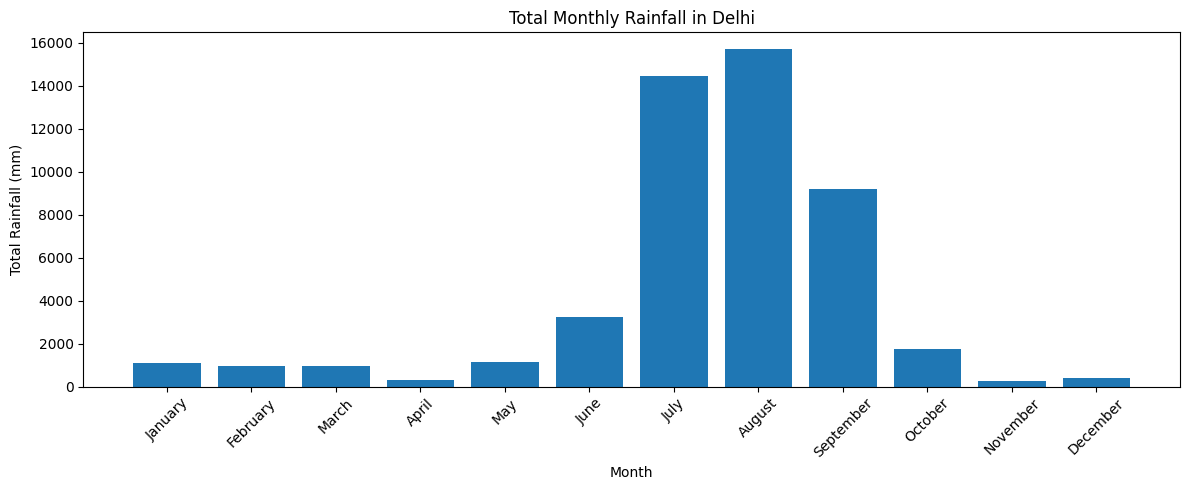

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dehli rain prediction day wise.csv")


df["Rain"] = df["Rain"].replace("Tr", 0).astype(float)



df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")



df["month_name"] = df["Date"].dt.month_name()
df["Month"] = df["Date"].dt.month   # FIXED



rain_monthly = df.groupby("month_name")["Rain"].sum()



month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

rain_monthly = rain_monthly.reindex(month_order)



plt.figure(figsize=(12,5))
plt.bar(rain_monthly.index, rain_monthly.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.title("Total Monthly Rainfall in Delhi")
plt.tight_layout()
plt.show()


In [32]:
#RAIN vs NO-RAIN DAYS

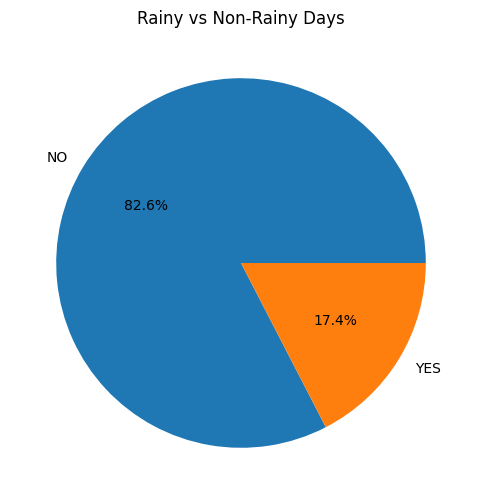

In [33]:
plt.figure(figsize=(6,6))
df["Has_rained"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Rainy vs Non-Rainy Days")
plt.ylabel("")
plt.show()

# Graph on clothes Drying & Umbrella Decision Guide Based on Weather Patterns

<Figure size 1200x500 with 0 Axes>

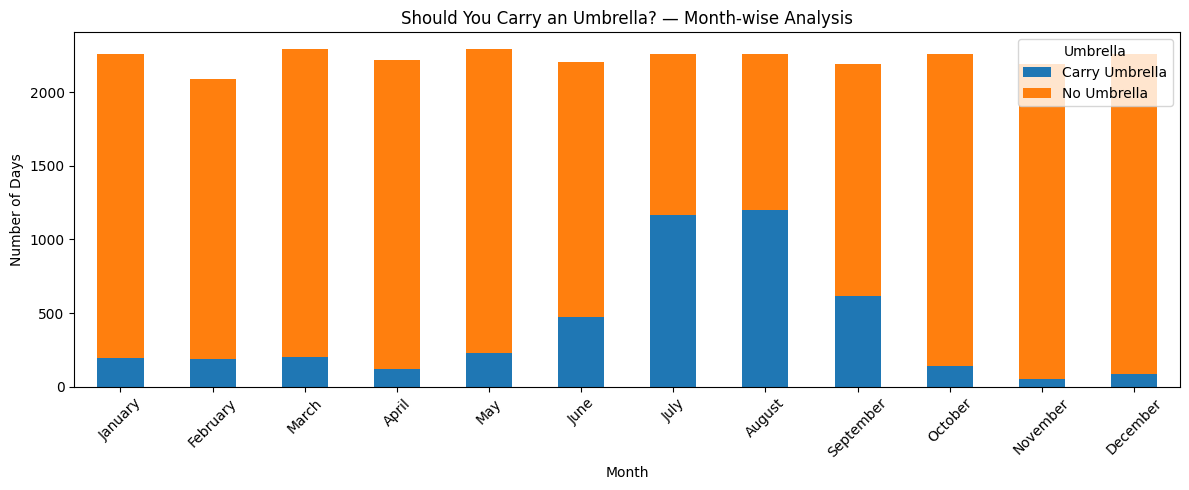

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

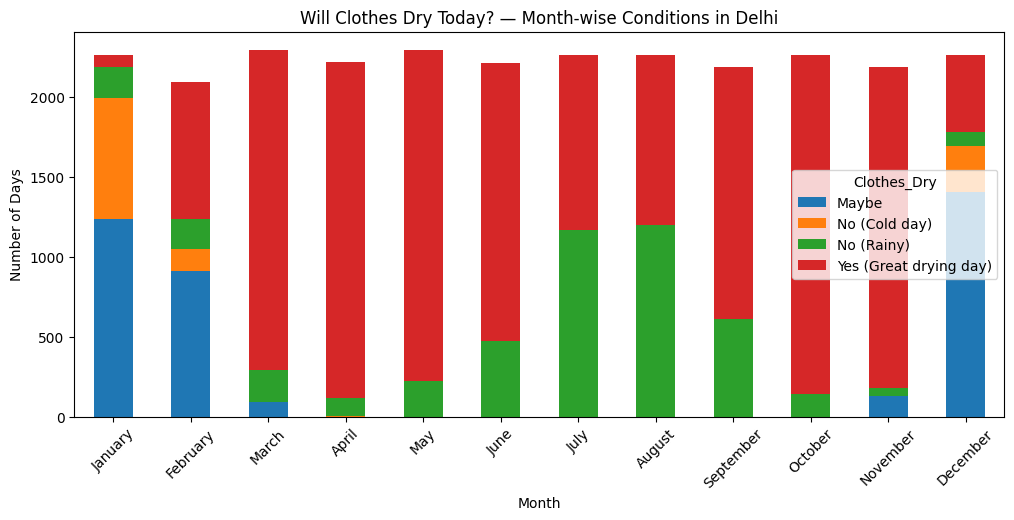

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Dehli rain prediction day wise.csv")

# Fix Rain
df["Rain"] = df["Rain"].replace("Tr", 0).astype(float)

# Convert date and extract month
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["month_name"] = df["Date"].dt.month_name()


df["Umbrella"] = df["Rain"].apply(lambda x: "Carry Umbrella" if x > 0 else "No Umbrella")

umbrella_counts = df.groupby(["month_name", "Umbrella"]).size().unstack()

# Correct month order
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

umbrella_counts = umbrella_counts.reindex(month_order)

# Plot Umbrella Graph
plt.figure(figsize=(12,5))
umbrella_counts.plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Should You Carry an Umbrella? — Month-wise Analysis")
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



def drying_decision(row):
    if row["Rain"] > 0:
        return "No (Rainy)"
    elif row["Temp Max"] >= 25:
        return "Yes (Great drying day)"
    elif 20 <= row["Temp Max"] < 25:
        return "Maybe"
    else:
        return "No (Cold day)"

df["Clothes_Dry"] = df.apply(drying_decision, axis=1)

drying_counts = df.groupby(["month_name", "Clothes_Dry"]).size().unstack()
drying_counts = drying_counts.reindex(month_order)


drying_counts.plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Will Clothes Dry Today? — Month-wise Conditions in Delhi")
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.xticks(rotation=45)

